In [1]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
# Load the Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [3]:
# Sampling – Take 50 random rows from 150
X_sampled = X.sample(n=50, random_state=42)
y_sampled = y[X_sampled.index]

print("Original Shape:", X.shape)
print("Sampled Shape:", X_sampled.shape)


Original Shape: (150, 4)
Sampled Shape: (50, 4)


In [4]:
# Standardize data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sampled)

In [5]:
# Apply PCA to reduce 4 features → 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [6]:
# Convert to DataFrame and plot
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca['target'] = y_sampled

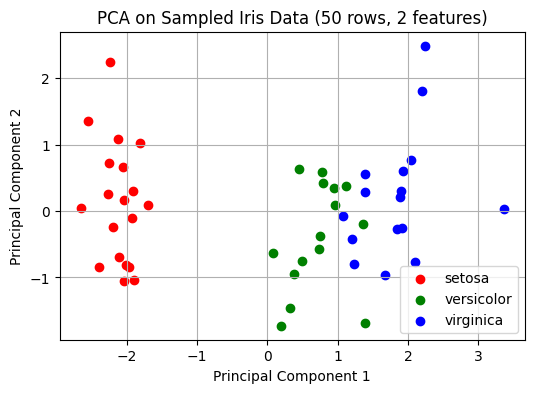

In [8]:
# Visualize result
plt.figure(figsize=(6, 4))
colors = ['red', 'green', 'blue']
for i in range(3):
    plt.scatter(df_pca[df_pca['target'] == i]['PC1'],
                df_pca[df_pca['target'] == i]['PC2'],
                label=iris.target_names[i], color=colors[i])

plt.title("PCA on Sampled Iris Data (50 rows, 2 features)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()